ANALISE DE RISCO 

In [1]:
#IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [2]:
file_path = 'data/bank-full.csv'
df = pd.read_csv(file_path,sep=';')

In [3]:

#entendo as variaveis da base de dados
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#entendendo a distribuição de idade
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

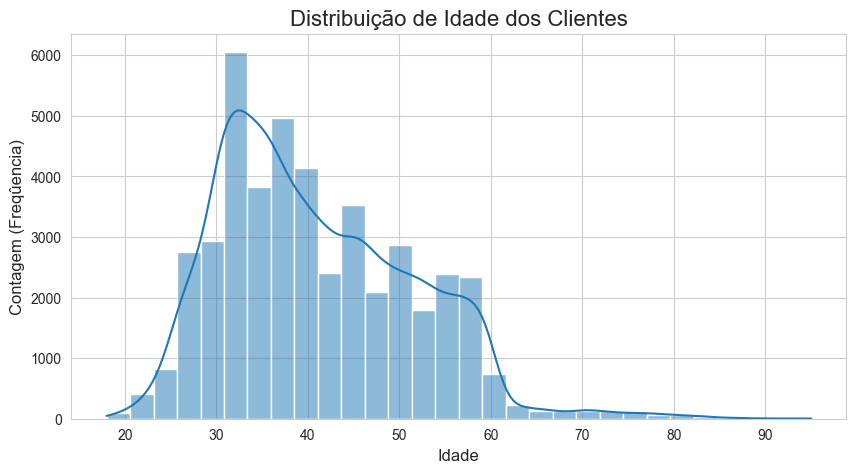

In [5]:
#verificamos que a maior parte dos clientes tem entre 30 a 40 anos, com 30/32 tendo o maior numero de clientes

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='age',kde=True,bins=30)
plt.title('Distribuição de Idade dos Clientes', fontsize  =16)
plt.xlabel('Idade',fontsize = 12)
plt.ylabel ('Contagem (Freqûencia)', fontsize =12)
plt.show()

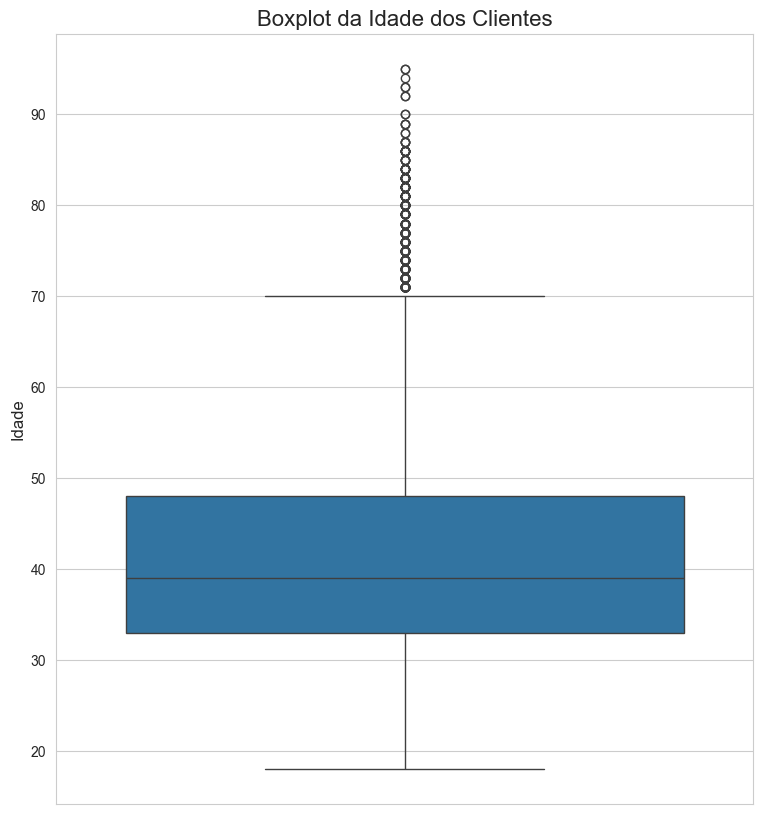

In [6]:
#boxplot para verificarmos a existencia de outliers

plt.figure(figsize=(9,10))
sns.boxplot(data=df,y='age')
plt.title('Boxplot da Idade dos Clientes', fontsize = 16)
plt.ylabel('Idade',fontsize=12)
plt.show()

Analisando os graficos de distribuição de idade, fica claro que nosso público-alvo prinicpal é de meia-idade(30-40 anos), com uma base de clientes que se estende até idades bem avançadas (95 anos)

In [7]:
#entendo as profissoes dos clientes do banco
contar_profissoes = df['job'].value_counts()
proporcao_profissoes= df['job'].value_counts(normalize = True) * 100
print(contar_profissoes)
print(proporcao_profissoes.round(2))

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
job
blue-collar      21.53
management       20.92
technician       16.80
admin.           11.44
services          9.19
retired           5.01
self-employed     3.49
entrepreneur      3.29
unemployed        2.88
housemaid         2.74
student           2.07
unknown           0.64
Name: proportion, dtype: float64


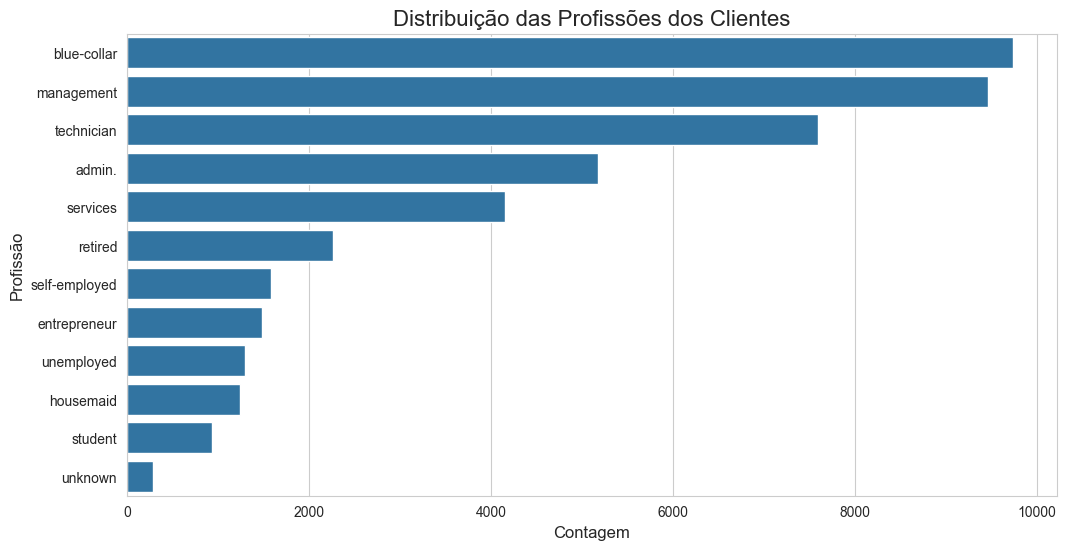

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(y='job',data=df,order=contar_profissoes.index)
plt.title('Distribuição das Profissões dos Clientes', fontsize = 16)
plt.xlabel('Contagem',fontsize=12)
plt.ylabel('Profissão',fontsize=12)
plt.show()

A maioria dos nossos clientes está concentrada em profissionais manuais/fabricas, gestão/administrativa e técnicos

In [10]:
contar_contatos = df['contact'].value_counts()
proporcao_contatos = df['contact'].value_counts(normalize = True) * 100
print(contar_contatos)
print(proporcao_contatos.round(2))

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
contact
cellular     64.77
unknown      28.80
telephone     6.43
Name: proportion, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_13424\2064254092.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='contact',data=df,order=contar_contatos.index,palette='pastel')


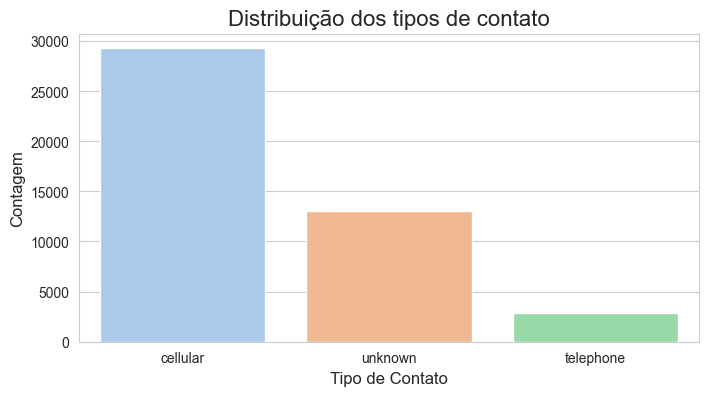

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(x='contact',data=df,order=contar_contatos.index,palette='pastel')
plt.title('Distribuição dos tipos de contato', fontsize=16)
plt.xlabel('Tipo de Contato', fontsize=12)
plt.ylabel('Contagem',fontsize=12)
plt.show()

Grafico de dispersão para idade vs saldo


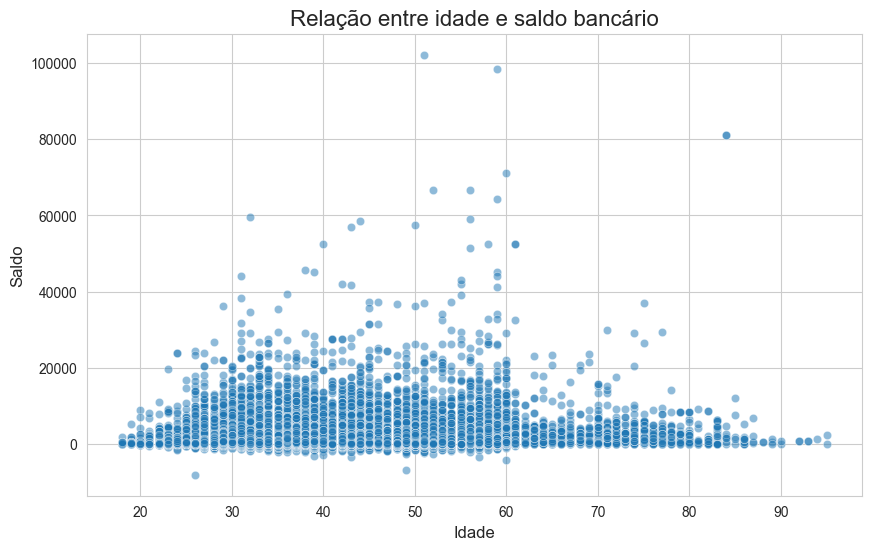

Overplotting


In [20]:
print('Grafico de dispersão para idade vs saldo')
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='age',y='balance',alpha=0.5)
plt.title('Relação entre idade e saldo bancário', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Saldo', fontsize=12)
plt.show()
print('Overplotting')

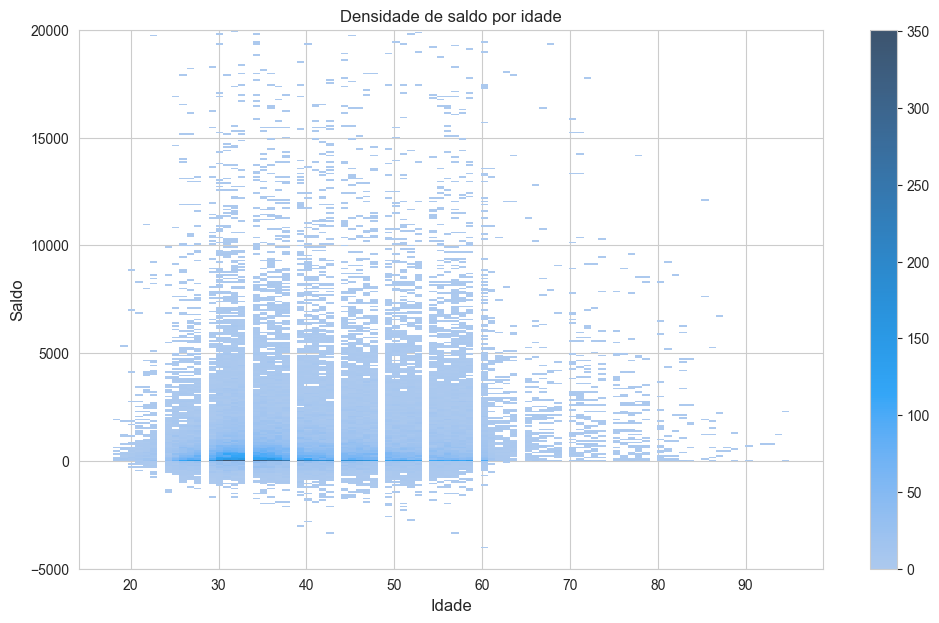

In [26]:
plt.figure(figsize=(12,7))
sns.histplot(data=df,x='age',y='balance',cbar='true')
plt.title('Densidade de saldo por idade',fontsize=12)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Saldo',fontsize=12)
plt.ylim(-5000, 20000)
plt.show()

Gerando Boxplots para Saldo vs. Default, Housing e Loan...


C:\Users\User\AppData\Local\Temp\ipykernel_13424\3962179743.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='default', y='balance', ax=ax1, palette='pastel')
C:\Users\User\AppData\Local\Temp\ipykernel_13424\3962179743.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='housing', y='balance', ax=ax2, palette='pastel')
C:\Users\User\AppData\Local\Temp\ipykernel_13424\3962179743.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan', y='balance', ax=ax3, palette='pastel')


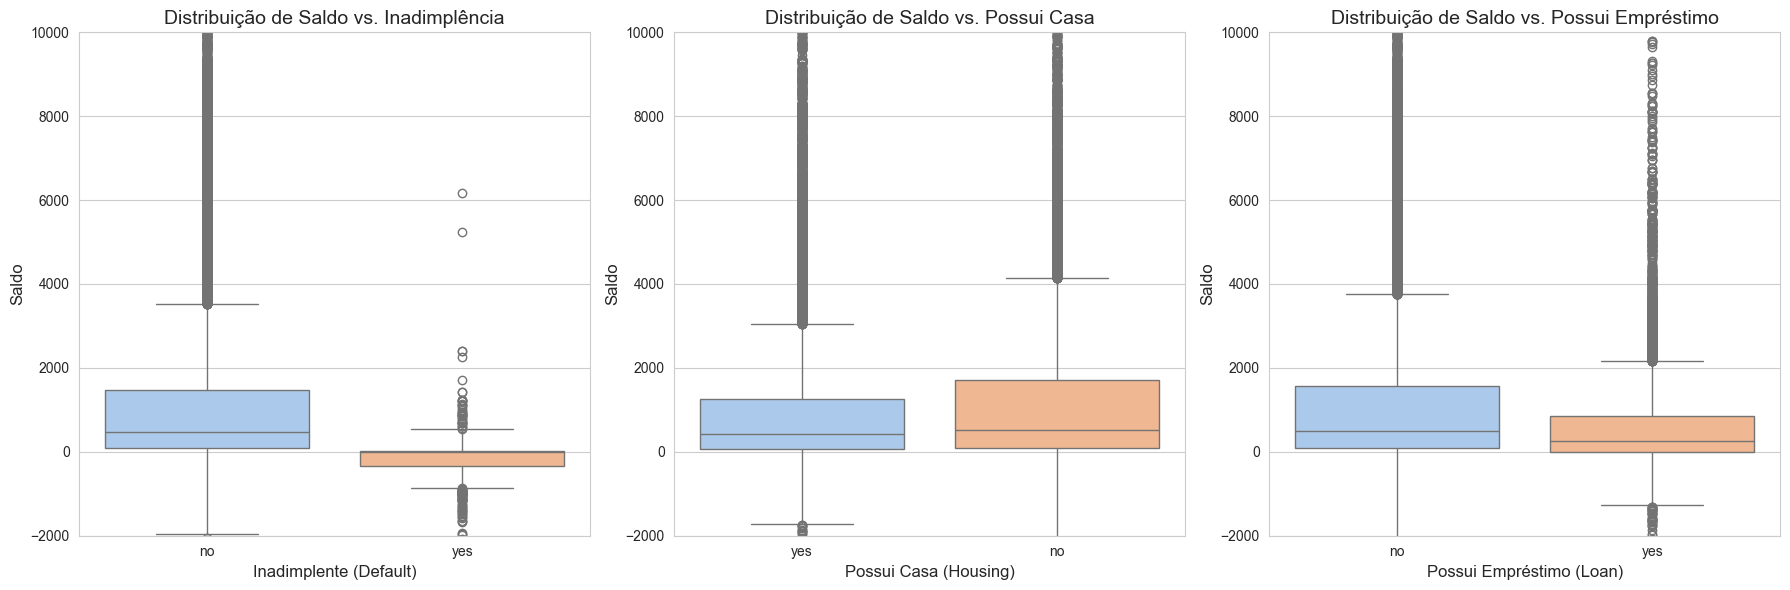

In [27]:
print("Gerando Boxplots para Saldo vs. Default, Housing e Loan...")
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
sns.boxplot(data=df, x='default', y='balance', ax=ax1, palette='pastel')
ax1.set_title('Distribuição de Saldo vs. Inadimplência', fontsize=14)
ax1.set_xlabel('Inadimplente (Default)', fontsize=12)
ax1.set_ylabel('Saldo', fontsize=12)
ax1.set_ylim(-2000, 10000) # Aplicando um "zoom" para ver melhor as caixas

sns.boxplot(data=df, x='housing', y='balance', ax=ax2, palette='pastel')
ax2.set_title('Distribuição de Saldo vs. Possui Casa', fontsize=14)
ax2.set_xlabel('Possui Casa (Housing)', fontsize=12)
ax2.set_ylabel('Saldo', fontsize=12)
ax2.set_ylim(-2000, 10000) # Zoom

sns.boxplot(data=df, x='loan', y='balance', ax=ax3, palette='pastel')
ax3.set_title('Distribuição de Saldo vs. Possui Empréstimo', fontsize=14)
ax3.set_xlabel('Possui Empréstimo (Loan)', fontsize=12)
ax3.set_ylabel('Saldo', fontsize=12)
ax3.set_ylim(-2000, 10000) # Zoom

plt.tight_layout() 
plt.show()

In [34]:

print('Definindo e Separando Outliers (Método IQR)")

Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)

IQR = Q3 - Q1
limite_superior = Q3 + (1.5 * IQR)

print(f"Quartil 1 (Q1): {Q1} euros")
print(f"Quartil 3 (Q3): {Q3} euros")
print(f"Intervalo Interquartil (IQR): {IQR} euros")
print(f"Limite Superior: Um saldo acima de {limite_superior.round(2)} euros será considerado outlier.")

df_outliers = df[df['balance'] > limite_superior]

df_nao_outliers = df[df['balance'] <= limite_superior]

print(f"\nNúmero total de clientes: {len(df)}")
print(f"Número de clientes Outliers: {len(df_outliers)}")
print(f"Número de clientes Não-Outliers: {len(df_nao_outliers)}")
print(f"Proporção de Outliers: {round(len(df_outliers) / len(df) * 100, 2)}%")

--- Definindo e Separando Outliers (Método IQR) ---
Quartil 1 (Q1): 72.0 euros
Quartil 3 (Q3): 1428.0 euros
Intervalo Interquartil (IQR): 1356.0 euros
Limite Superior: Um saldo acima de 3462.0 euros será considerado outlier.

Número total de clientes: 45211
Número de clientes Outliers: 4712
Número de clientes Não-Outliers: 40499
Proporção de Outliers: 10.42%


In [37]:

print("Analisando a Taxa de Conversão")

conversao_nao_outliers = df_nao_outliers['y'].value_counts(normalize=True) * 100
print(f"\nGrupo NÃO-OUTLIERS (Saldo <= {limite_superior.round(2)}):")
print(conversao_nao_outliers.round(2))
conversao_outliers = df_outliers['y'].value_counts(normalize=True) * 100
print(f"\nGrupo OUTLIERS (Saldo > {limite_superior.round(2)}):")
print(conversao_outliers.round(2))

Analisando a Taxa de Conversão

Grupo NÃO-OUTLIERS (Saldo <= 3462.0):
y
no     88.83
yes    11.17
Name: proportion, dtype: float64

Grupo OUTLIERS (Saldo > 3462.0):
y
no     83.74
yes    16.26
Name: proportion, dtype: float64


nDescrição de Idade - Grupo NÃO-OUTLIERS:
count    40499.00
mean        40.63
std         10.47
min         18.00
25%         32.00
50%         39.00
75%         48.00
max         95.00
Name: age, dtype: float64

Descrição de Idade - Grupo OUTLIERS:
count    4712.00
mean       43.57
std        11.52
min        19.00
25%        34.00
50%        42.00
75%        52.00
max        87.00
Name: age, dtype: float64


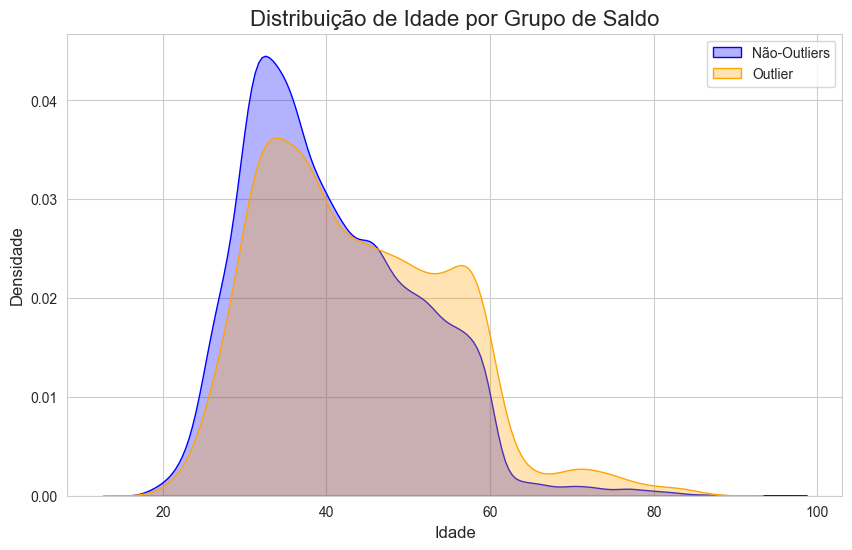

In [40]:
print("nDescrição de Idade - Grupo NÃO-OUTLIERS:")
print(df_nao_outliers['age'].describe().round(2))

print("\nDescrição de Idade - Grupo OUTLIERS:")
print(df_outliers['age'].describe().round(2))


plt.figure(figsize=(10, 6))
sns.kdeplot(df_nao_outliers['age'], label='Não-Outliers', color='blue', fill=True, alpha=0.3)
sns.kdeplot(df_outliers['age'], label='Outlier', color='orange', fill=True, alpha=0.3)

plt.title('Distribuição de Idade por Grupo de Saldo', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend()
plt.show()

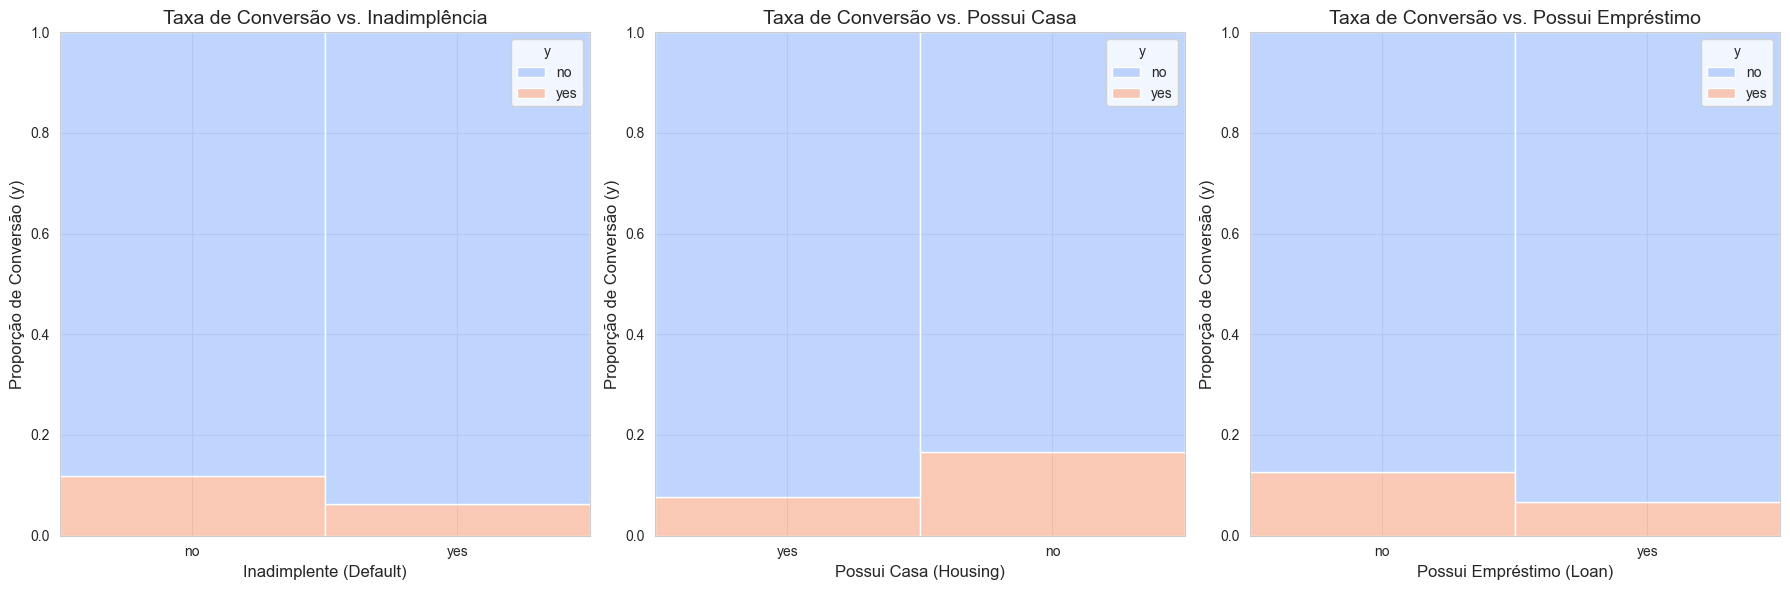

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
sns.histplot(data=df, x='default', hue='y', multiple='fill', stat='proportion', ax=ax1, palette='coolwarm')
ax1.set_title('Taxa de Conversão vs. Inadimplência', fontsize=14)
ax1.set_xlabel('Inadimplente (Default)', fontsize=12)
ax1.set_ylabel('Proporção de Conversão (y)', fontsize=12)

sns.histplot(data=df, x='housing', hue='y', multiple='fill', stat='proportion', ax=ax2, palette='coolwarm')
ax2.set_title('Taxa de Conversão vs. Possui Casa', fontsize=14)
ax2.set_xlabel('Possui Casa (Housing)', fontsize=12)
ax2.set_ylabel('Proporção de Conversão (y)', fontsize=12)

sns.histplot(data=df, x='loan', hue='y', multiple='fill', stat='proportion', ax=ax3, palette='coolwarm')
ax3.set_title('Taxa de Conversão vs. Possui Empréstimo', fontsize=14)
ax3.set_xlabel('Possui Empréstimo (Loan)', fontsize=12)
ax3.set_ylabel('Proporção de Conversão (y)', fontsize=12)

plt.tight_layout()
plt.show()

In [43]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
matriz_corr = df_numeric.corr(method='pearson')
print(matriz_corr)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


Mapa de Calo


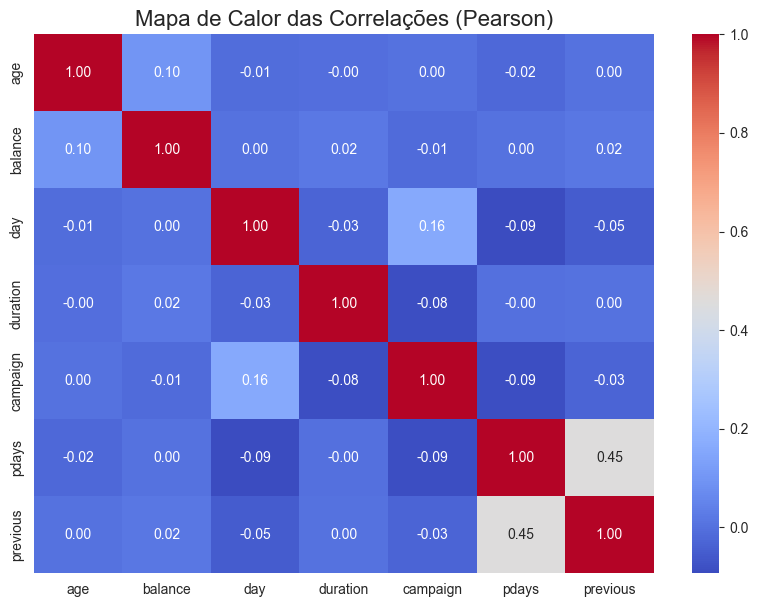

In [44]:

print("Mapa de Calor")

plt.figure(figsize=(10, 7)) 

sns.heatmap(data=matriz_corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Mapa de Calor das Correlações (Pearson)', fontsize=16)
plt.show()

     y  percentage     grupo_contato
0   no   90.842669    Clientes Novos
1  yes    9.157331    Clientes Novos
0   no   76.928667  Clientes Antigos
1  yes   23.071333  Clientes Antigos


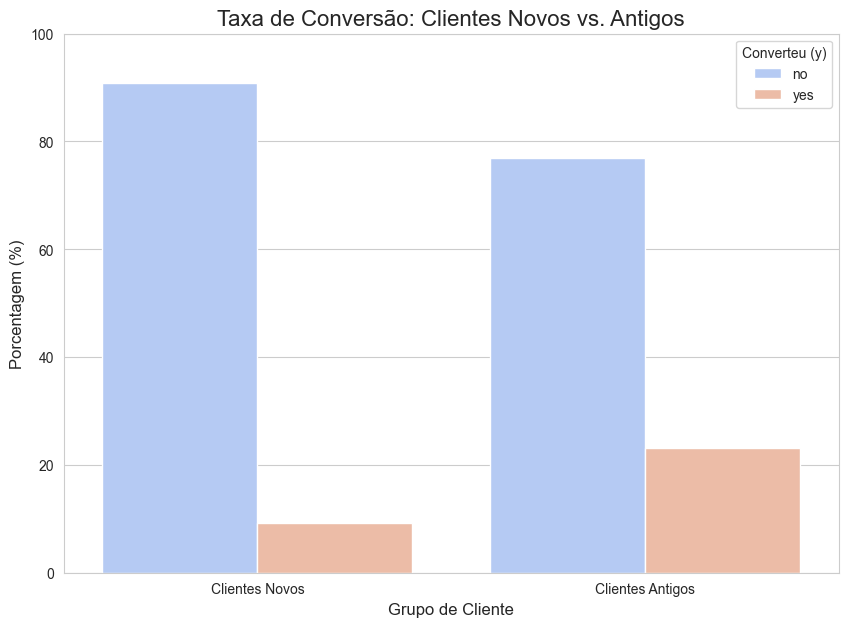

In [48]:
df_clientes_novos = df[df['previous'] == 0]
df_clientes_antigos = df[df['previous'] > 0]
conversao_novos = df_clientes_novos['y'].value_counts(normalize=True) * 100
conversao_antigos = df_clientes_antigos['y'].value_counts(normalize=True) * 100

df_novos_plot = conversao_novos.reset_index()
df_novos_plot.columns = ['y', 'percentage']
df_novos_plot['grupo_contato'] = 'Clientes Novos' # Adiciona uma coluna de categoria
df_antigos_plot = conversao_antigos.reset_index()
df_antigos_plot.columns = ['y', 'percentage']
df_antigos_plot['grupo_contato'] = 'Clientes Antigos' # Adiciona uma coluna de categoria
df_plot_final = pd.concat([df_novos_plot, df_antigos_plot])
print(df_plot_final)
plt.figure(figsize=(10, 7))
sns.barplot(data=df_plot_final, x='grupo_contato', y='percentage', hue='y', palette='coolwarm')
plt.title('Taxa de Conversão: Clientes Novos vs. Antigos', fontsize=16)
plt.xlabel('Grupo de Cliente', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.ylim(0, 100) 
plt.legend(title='Converteu (y)')
plt.show()